
  ![Imagen](https://upload.wikimedia.org/wikipedia/commons/d/df/UNL3.png)

# UNIVERSIDAD NACIONAL DE LOJA 
 ## Autor: John Alejandro Torres Alvarez 
##  Tutor : Ing. Alexander López, Mgs. 

##  *Análisis de opinión en Twitter sobre el COVID-19 en ECUADOR*

### Librerias necesarias para los corpus y plot

In [3]:

import unidecode
import pickle
import random
import nltk

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from palettable.colorbrewer.sequential import Reds_9
from palettable.cmocean.diverging import Balance_20
from palettable.tableau import BlueRed_12
from PIL import Image
from collections import Counter

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple (Balance_20.colors[random.randint(2,18)])

#from scipy.misc import imread

ModuleNotFoundError: No module named 'unidecode'

### Lectura del DATASET proveniente de R (Algoritmo Naive Bayes Aplicado)

In [37]:

# Lectura de DATASET.CSV alojado en Google Drive
pd.read_csv("https://docs.google.com/spreadsheets/d/1kyJdXH6TbqJBhlrbo0MaJA-7GJbO33RZB20PU85SvAc/export?format=csv")



,X,text,POSITIVO,NEGATIVO,POSITIVO/NEGATIVO,Mejor_Ajuste,SUMATORIA
0,1,teoria creacion covid arma biologica,10.00,10.00,1.00,neutral,0.00
1,2,hermana abuelito superado peligro covid guerre...,19.09,76.33,0.25,negativo,-57.24
2,3,remdesivir medicamento acaban inventar curar c...,28.19,38.43,0.73,negativo,-10.24
3,4,medios residencia universitaria alojara person...,37.28,28.95,1.29,positivo,8.33
4,5,padrastro recupero covid,0.90,0.52,1.73,positivo,0.38
...,...,...,...,...,...,...,...
149072,149073,covid,0.90,0.52,1.73,positivo,0.38
149073,149074,alerta mundial oms alerta record infecciones c...,46.38,10.00,4.64,positivo,36.38
149074,149075,trabajo articulado alcaldia puerto rico meta b...,37.28,10.00,3.73,positivo,27.28
149075,149076,mona hedionda quizas aplaste carro covid no ma...,19.09,38.43,0.50,negativo,-19.34


In [5]:
tuits_df = pd.read_csv("https://docs.google.com/spreadsheets/d/1kyJdXH6TbqJBhlrbo0MaJA-7GJbO33RZB20PU85SvAc/export?format=csv")


# <center> Visualización  de los Resultados Finales</center>

### Gráfico 1: Histograma de acuerdo a la categoria Mejor Ajuste

<IPython.core.display.Javascript object>


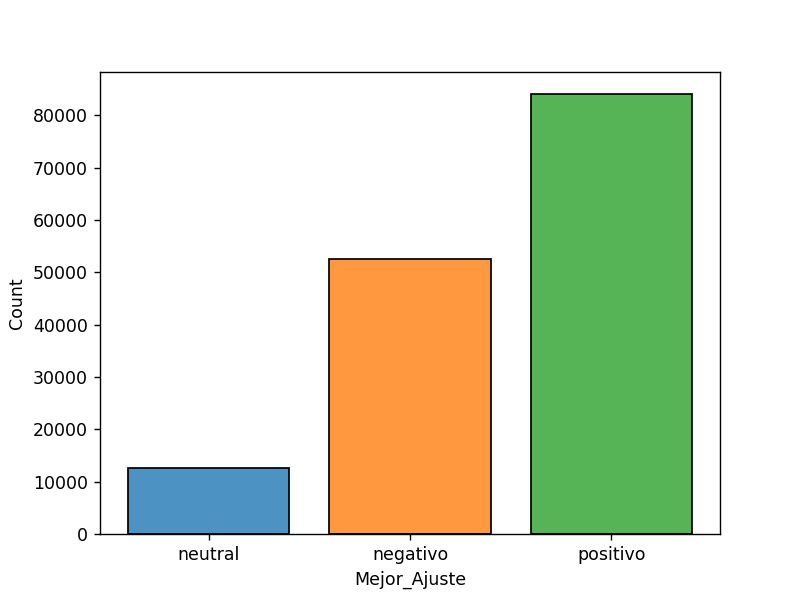

<AxesSubplot:xlabel='Mejor_Ajuste', ylabel='Count'>

In [29]:
%matplotlib notebook
sns.histplot(data = tuits_df, x= "Mejor_Ajuste",hue="Mejor_Ajuste", shrink=.8, alpha=.8, legend=False 
            )




### Gráfico 2: Curva de densidad de probabilidad, Categoría: Mejor Ajuste



<IPython.core.display.Javascript object>


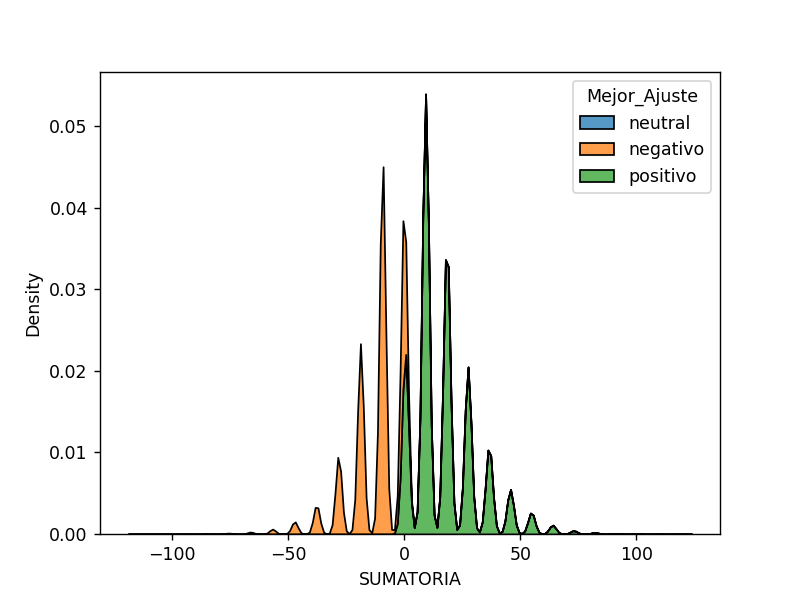

c:\users\alejandrodelatorre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='SUMATORIA', ylabel='Density'>

In [31]:
%matplotlib notebook
sns.kdeplot(data = tuits_df, x= "SUMATORIA",hue="Mejor_Ajuste", multiple="stack")

### Gráfico 3: División de los Diagramas de distribución con respecto a Mejor Ajuste

<IPython.core.display.Javascript object>


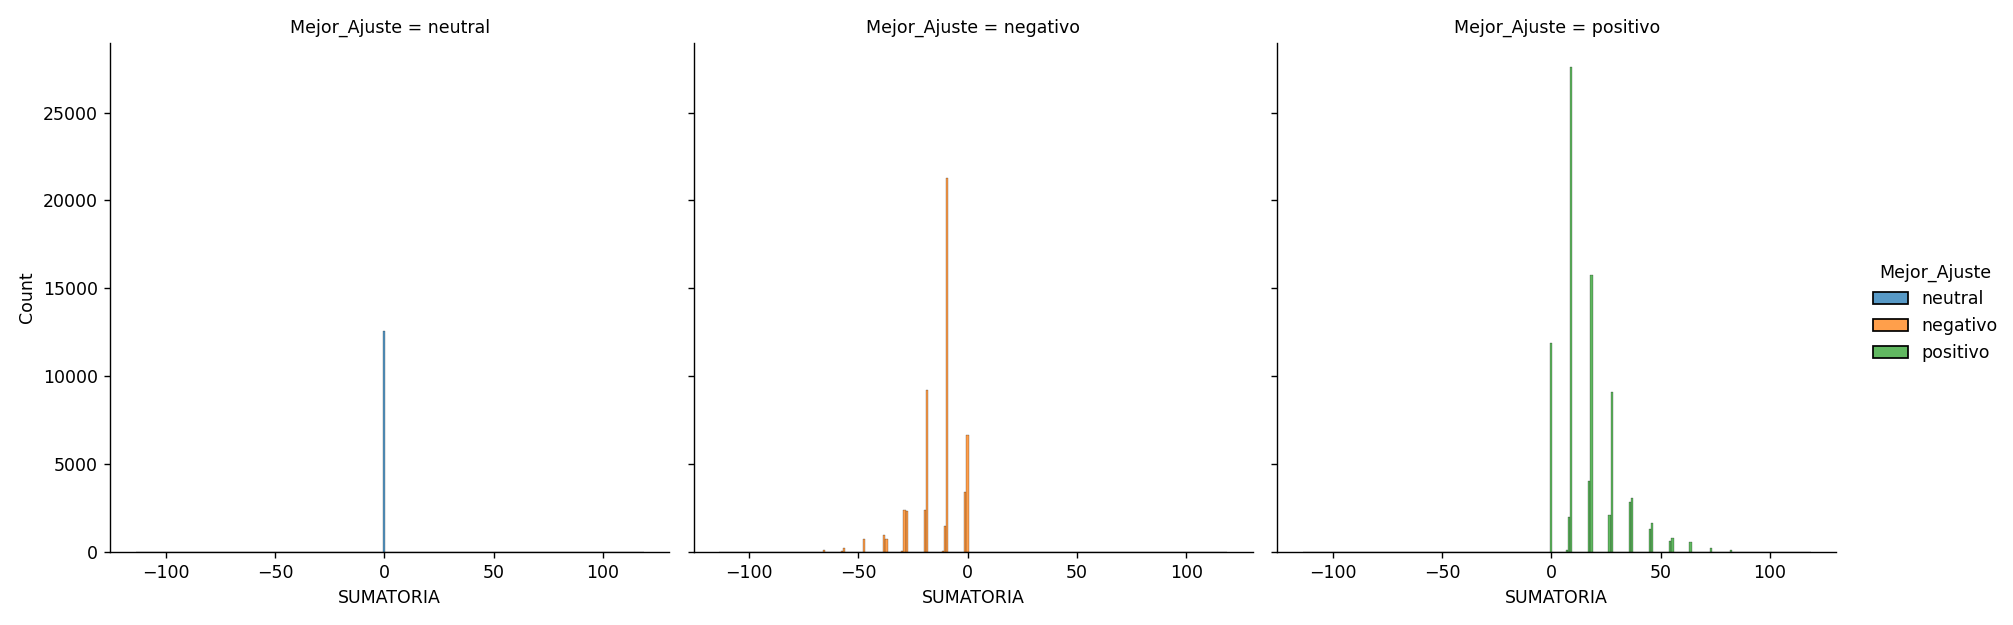

In [32]:
%matplotlib notebook
sns.displot(data = tuits_df, x= "SUMATORIA",hue="Mejor_Ajuste", col="Mejor_Ajuste")


### Creación de Dataframe según su polaridad


In [6]:
tuits_positivos_df = tuits_df[(tuits_df.text != "null") & (tuits_df.Mejor_Ajuste == "positivo")]
tuits_negativos_df = tuits_df[(tuits_df.text != "null") & (tuits_df.Mejor_Ajuste == "negativo")]
tuits_neutros_df = tuits_df[(tuits_df.text != "null") & (tuits_df.Mejor_Ajuste == "neutral")]

In [7]:
textoPos = ' '.join(tuits_positivos_df.fillna('')['text'].tolist())
textoNeg = ' '.join(tuits_negativos_df.fillna('')['text'].tolist())
textoNeu = ' '.join(tuits_neutros_df.fillna('')['text'].tolist())

In [40]:
len(textoPos)

8900253

In [41]:
len(textoNeg)

5531819

In [42]:
len(textoNeu)

1033711

### Utilización de librería NLTK para stopwords en español

In [48]:
import nltk
nltk.download('stopwords')
stopwords = set(stopwords.words('spanish')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AlejandroDeLaTorre\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Unzipping corpora\stopwords.zip.


In [62]:
stopwords = open("./stopwords.txt","r").read().splitlines()

### Funciones para nubes de palabras

In [51]:
nubePos= WordCloud(
    background_color="rgba(255,255,255,0)",mode="RGBA",
    width=1800,
    height=1400,
    stopwords=stopwords

).generate(textoPos)
nubePos.recolor(color_func=color_func, random_state=3)

In [60]:
nubeNeg= WordCloud(
    background_color="rgba(255,255,255,0)",mode="RGBA",
    width=1800,
    height=1400,
    stopwords=stopwords

).generate(textoNeg)
nubeNeg.recolor(color_func=color_func, random_state=3)

In [53]:
nubeNeu= WordCloud(
    background_color="rgba(255,255,255,0)",mode="RGBA",
    width=1800,
    height=1400,
    stopwords=stopwords

).generate(textoNeu)
nubeNeu.recolor(color_func=color_func, random_state=3)

### Gráfico 4: Nube de palabras POSITIVO

<IPython.core.display.Javascript object>


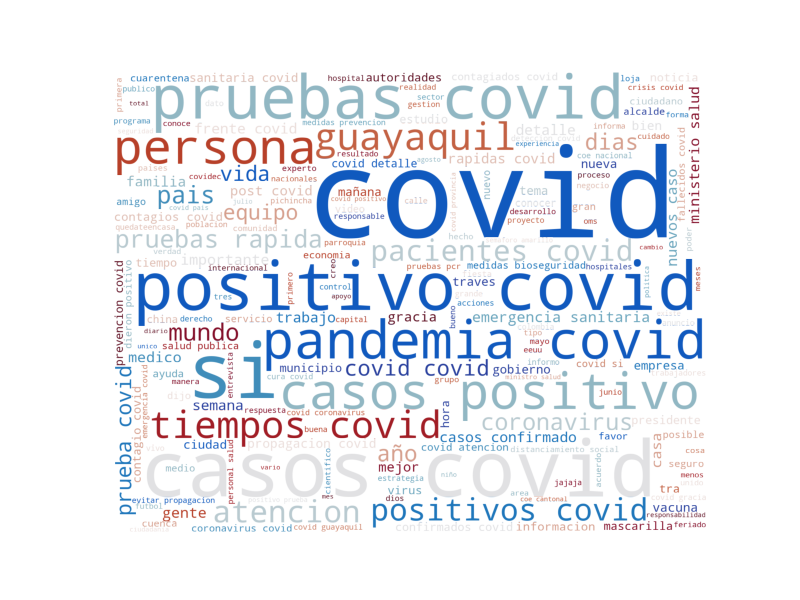

In [54]:
%matplotlib notebook
plt.imshow(nubePos)
plt.axis('off')
plt.savefig('./Positivos.png',dpi=600)
plt.show()

### Gráfico 5: Nube de palabras NEGATIVO

<IPython.core.display.Javascript object>


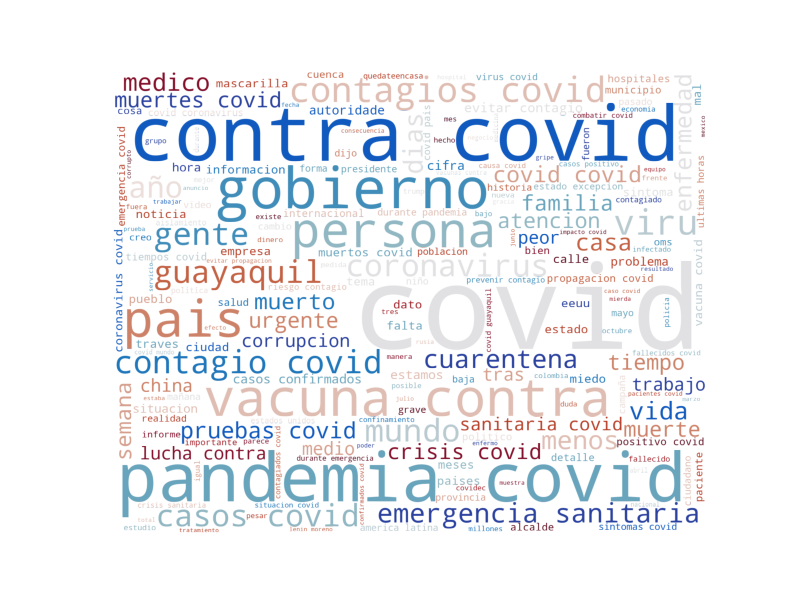

In [86]:
%matplotlib notebook
plt.imshow(nubeNeg)
plt.axis('off')
plt.savefig('./Negativos.png',dpi=600)
plt.show()

### Gráfico 6: Nube de palabras NEUTRO

<IPython.core.display.Javascript object>


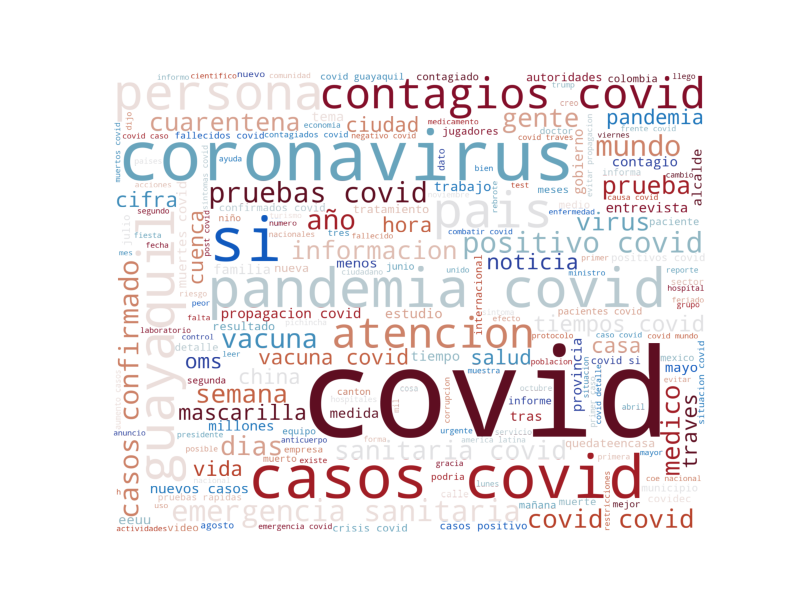

In [87]:
%matplotlib notebook
plt.imshow(nubeNeu)
plt.axis('off')
plt.savefig('./Neutro.png',dpi=600)
plt.show()

In [18]:
dffilter = tuits_df.loc[(tuits_df.loc[:, tuits_df.dtypes != object] != 0).any(1)]
dffilter.describe()


,X,POSITIVO,NEGATIVO,POSITIVO/NEGATIVO,SUMATORIA
count,149077.000000,149077.000000,149077.000000,149077.000000,149077.000000
mean,74539.000000,18.476626,13.539522,10.591485,4.937103
std,43034.967377,15.346779,12.967823,21.160770,18.942464
min,1.000000,0.900000,0.520000,0.010000,-113.710000
25%,37270.000000,10.000000,0.520000,0.590000,-9.100000
50%,74539.000000,19.090000,10.000000,1.730000,0.380000
75%,111808.000000,28.190000,19.470000,4.640000,18.190000
max,149077.000000,119.150000,123.710000,228.720000,118.630000


### Gráfico 7: Relación lineal entre Sumatoria y Positividad ( Cluster Positivo ) 

<IPython.core.display.Javascript object>


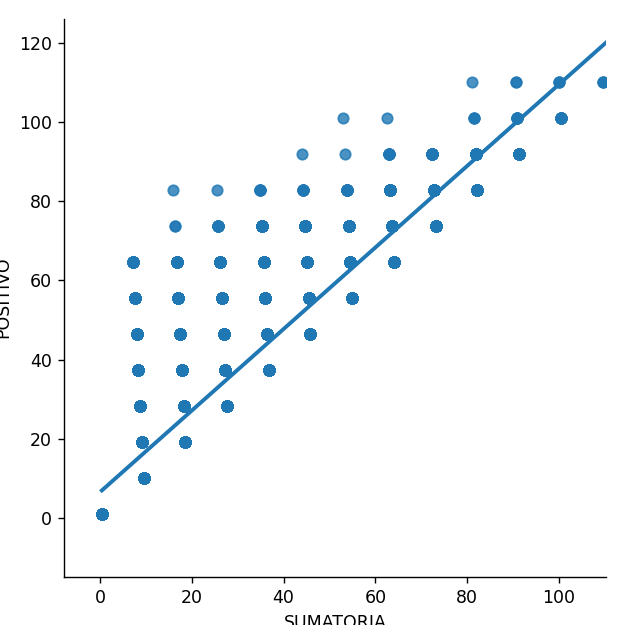

In [43]:
sns.lmplot(x='SUMATORIA', y='POSITIVO', data=tuits_positivos_df)

In [41]:
tuits_positivos_df

,X,text,POSITIVO,NEGATIVO,POSITIVO/NEGATIVO,Mejor_Ajuste,SUMATORIA
3,4,medios residencia universitaria alojara person...,37.28,28.95,1.29,positivo,8.33
4,5,padrastro recupero covid,0.90,0.52,1.73,positivo,0.38
8,9,costa objetivo brindar atencion medica oportun...,73.67,19.47,3.78,positivo,54.20
9,10,billeteras tarjetas creditos digitales fintech...,10.00,0.52,19.19,positivo,9.48
10,11,covid derechos laborales ambato detalles,19.09,0.52,36.65,positivo,18.57
...,...,...,...,...,...,...,...
149071,149072,tiempos libres covid estuviera disfrazada male...,10.00,0.52,19.19,positivo,9.48
149072,149073,covid,0.90,0.52,1.73,positivo,0.38
149073,149074,alerta mundial oms alerta record infecciones c...,46.38,10.00,4.64,positivo,36.38
149074,149075,trabajo articulado alcaldia puerto rico meta b...,37.28,10.00,3.73,positivo,27.28


### Gráfico 8: Relación lineal entre Sumatoria y Negatividad ( Cluster Negativo )

<IPython.core.display.Javascript object>


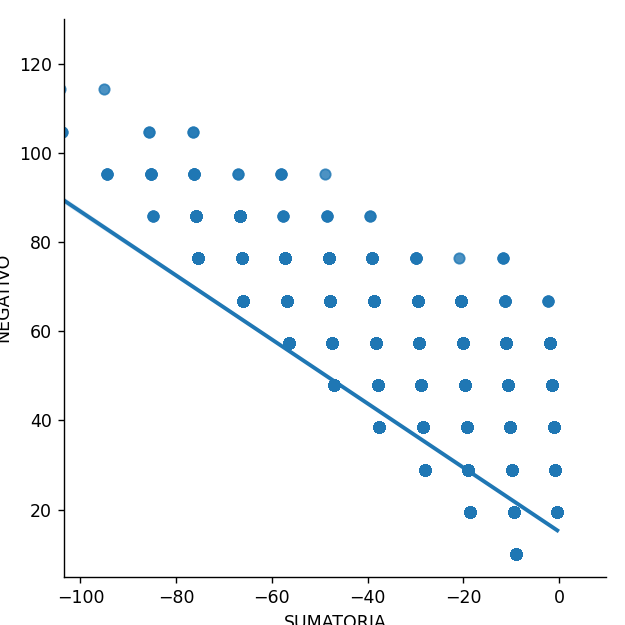

In [44]:
sns.lmplot(x='SUMATORIA', y='NEGATIVO', data=tuits_negativos_df)

In [45]:
tuits_negativos_df

,X,text,POSITIVO,NEGATIVO,POSITIVO/NEGATIVO,Mejor_Ajuste,SUMATORIA
1,2,hermana abuelito superado peligro covid guerre...,19.09,76.33,0.25,negativo,-57.24
2,3,remdesivir medicamento acaban inventar curar c...,28.19,38.43,0.73,negativo,-10.24
5,6,lista afecciones vinculadas coronavirus alarga...,0.90,10.00,0.09,negativo,-9.10
6,7,quiebra totalagenciane pequeñas medianas empre...,0.90,47.90,0.02,negativo,-47.00
11,12,doctor opina vacuna bcg prevenir covid podria ...,10.00,28.95,0.35,negativo,-18.95
...,...,...,...,...,...,...,...
149062,149063,centros comerciales guayaquil distanciamiento ...,10.00,19.47,0.51,negativo,-9.47
149067,149068,no meterme vida tomo atrevimiento recordarles ...,37.28,47.90,0.78,negativo,-10.62
149068,149069,toma temperatura deducen no llevan enfermos covid,0.90,10.00,0.09,negativo,-9.10
149070,149071,gobierno chino vende imagen virus covid practi...,10.00,38.43,0.26,negativo,-28.43


### Gráfico 9: Disperción lineal con valores ( Cluster Positivo)

<IPython.core.display.Javascript object>


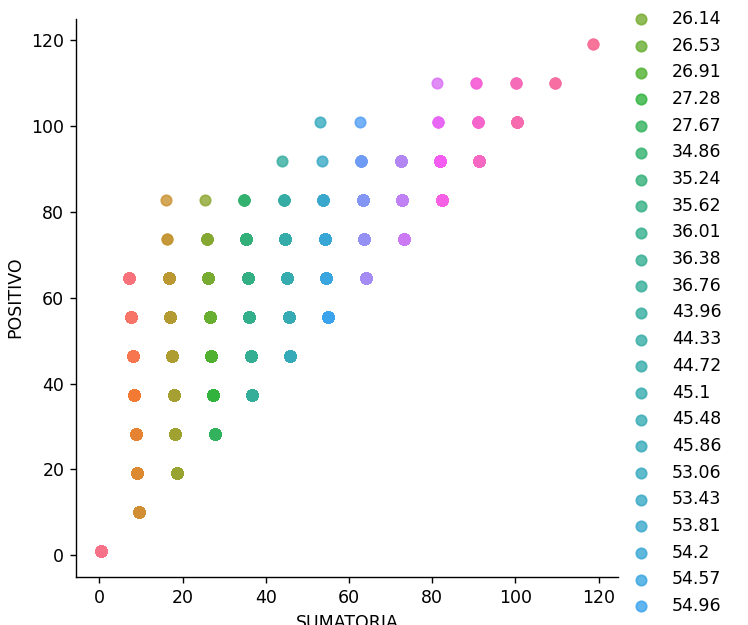

In [52]:
sns.lmplot(x='SUMATORIA', y='POSITIVO', data=tuits_positivos_df,fit_reg=False, hue='SUMATORIA')

### Gráfico 10: Disperción lineal con valores ( Cluster Negativo)

<IPython.core.display.Javascript object>


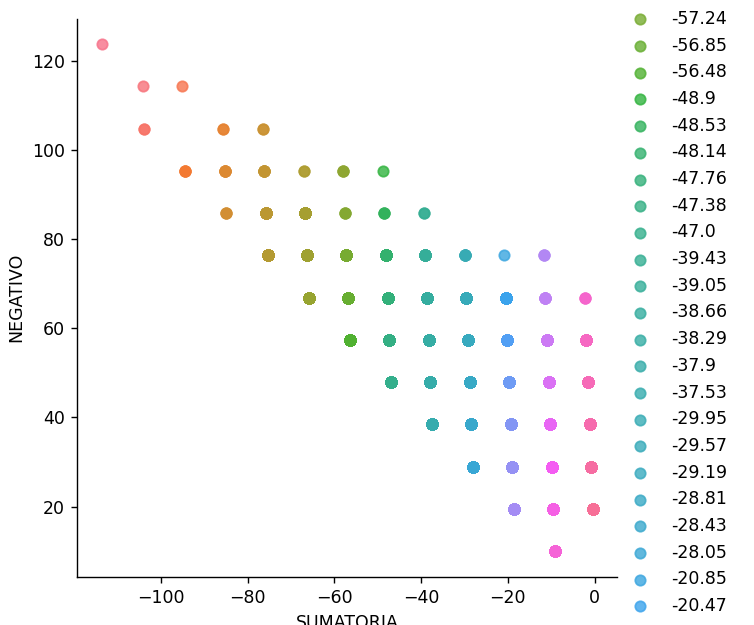

In [10]:
%matplotlib notebook
sns.lmplot(x='SUMATORIA', y='NEGATIVO', data=tuits_negativos_df,fit_reg=False, hue='SUMATORIA')

### Gráfico 11: Diagrama de cajas con respecto a la Positividad ( Cluster Positivo)

<IPython.core.display.Javascript object>


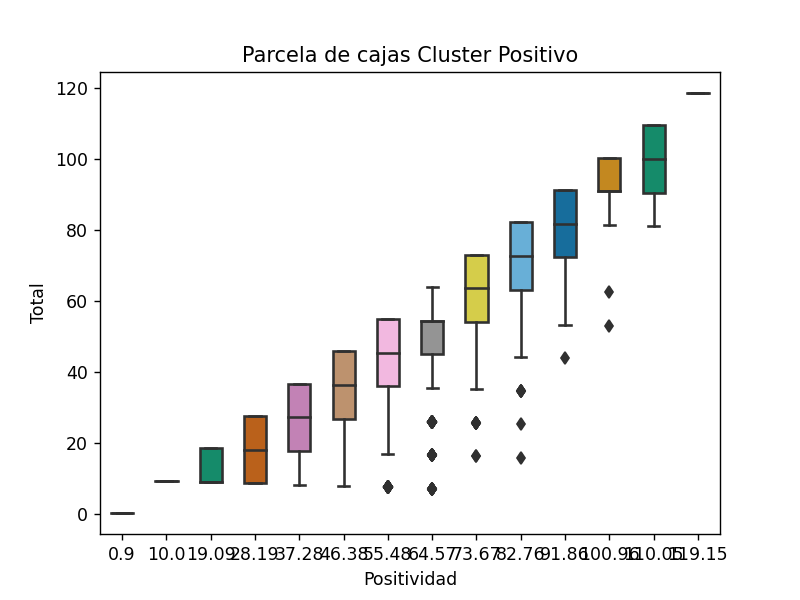

In [15]:
sns.boxplot(y='SUMATORIA', x='POSITIVO', 
                 data=tuits_positivos_df, 
                 width=0.5,
                 palette="colorblind")
plt.title("Parcela de cajas Cluster Positivo")
plt.suptitle("")
plt.xlabel("Positividad")
plt.ylabel("Total")
plt.show()

### Gráfico 12: Diagrama de cajas con respecto a la Neatividad ( Cluster Negativo)

<IPython.core.display.Javascript object>


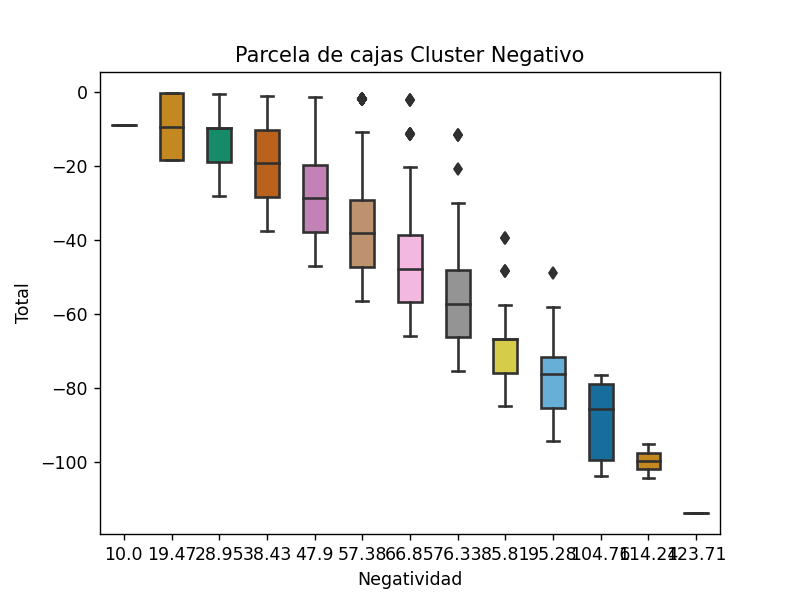

In [16]:
sns.boxplot(y='SUMATORIA', x='NEGATIVO', 
                 data=tuits_negativos_df, 
                 width=0.5,
                 palette="colorblind")
plt.title("Parcela de cajas Cluster Negativo")
plt.suptitle("")
plt.xlabel("Negatividad")
plt.ylabel("Total")
plt.show()

### Frecuencia de todo el data set 

In [23]:
texto = ' '.join(tuits_df.fillna('')['text'].tolist()) # vectorizacion en una sola dimiension


In [27]:
lista_texto = texto.split(" ")
palabras = []

#Paso intermedio para eliminar palabras muy cortas (emoticonos,etc) y muy largas (ulr o similar) que se nos hayan pasado:

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

In [63]:
word_tokens = lista_texto
filtered_text = []
for w in word_tokens:
    if w not in stopwords:
        filtered_text.append(w)

<IPython.core.display.Javascript object>


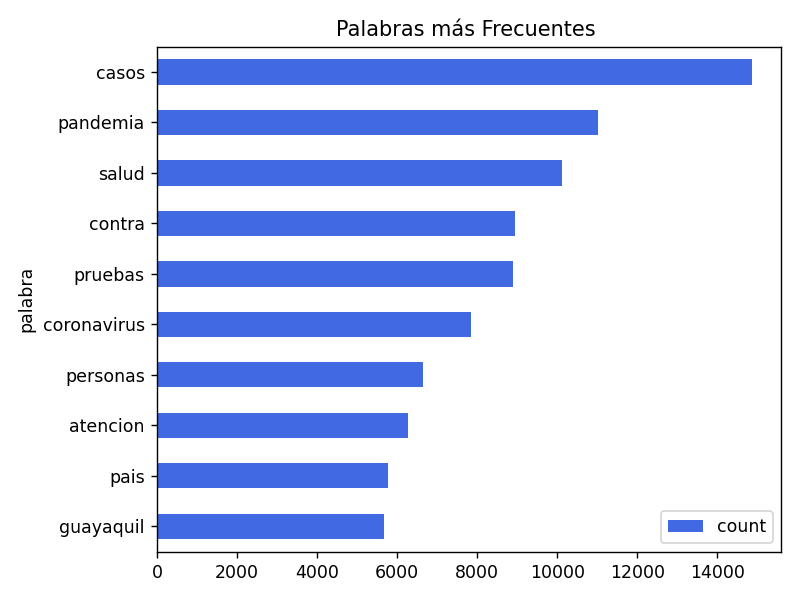

In [64]:
counter_tex = Counter(filtered_text) 
most_occur = counter_tex.most_common(10) 
df_f = pd.DataFrame(most_occur, columns=['palabra', 'count']).sort_values(by='count', ascending=True) 
df_f.plot.barh(x='palabra', y='count', rot=0, title='Palabras más Frecuentes ', color='royalblue') 
plt.tight_layout()